In [1]:
import stim
import numpy as np
import magic

circuit = magic.magic_preparation(
    T_sc_pre=1,
    T_lat_surg=3,
    T_before_grow=1,
    error_rate=0.001
)
circuit.diagram('timeline-svg')

circuit.to_file('../circuits/check_face_surgery.stim')

ModuleNotFoundError: No module named 'src'

In [4]:
dem = circuit.detector_error_model()

def check_errors_differ_by_L0(dem):
    """
    检查dem中是否有仅相差L0的error项。
    返回所有满足条件的error对。
    """
    import re
    # 提取所有error行
    error_lines = []
    for line in str(dem).splitlines():
        line = line.strip()
        if line.startswith("error("):
            # 提取概率和项
            m = re.match(r"error\([^\)]+\)\s+(.*)", line)
            if m:
                items = tuple(sorted(m.group(1).split()))
                error_lines.append(items)

    # 建立集合便于查找
    error_set = set(error_lines)
    pairs = []
    for items in error_lines:
        # 如果有L0，去掉L0再查找
        if "L0" in items:
            items_wo_L0 = tuple(sorted([x for x in items if x != "L0"]))
            if items_wo_L0 in error_set:
                pairs.append((items_wo_L0, items))
        else:
            # 没有L0，查找加上L0的
            items_with_L0 = tuple(sorted(list(items) + ["L0"]))
            if items_with_L0 in error_set:
                pairs.append((items, items_with_L0))
    # 去重
    unique_pairs = []
    seen = set()
    for a, b in pairs:
        key = (a, b)
        if key not in seen and (b, a) not in seen:
            unique_pairs.append((a, b))
            seen.add(key)
    return unique_pairs

def check_errors_pure_L0(dem):
    """
    检查 dem 中是否存在仅导致 L0 错误（且不触发任何 D 探测器）的 error 项。
    如果有，这意味着存在不可探测的逻辑错误 (Distance <= 1)。
    
    Returns:
        list: 所有导致纯 L0 错误的原始 error 字符串列表。
    """
    import re
    pure_L0_errors = []

    # 遍历 dem 的每一行
    for line in str(dem).splitlines():
        line = line.strip()
        # 仅处理 error 指令
        if line.startswith("error("):
            # 提取括号后的内容
            m = re.match(r"error\([^\)]+\)\s+(.*)", line)
            if m:
                # 获取该错误触发的所有目标 (如 D0, D1, L0)
                targets = m.group(1).split()
                
                # 判定条件：
                # 1. 列表中包含 "L0"
                # 2. 列表中不包含任何以 "D" 开头的探测器
                # (注意：根据需求，如果同时触发了 L1，但没有 D，也会被算在这里。
                #  如果必须是"只有L0且没有其他L"，可以增加 len(targets) == 1 判断)
                
                has_L0 = "L0" in targets
                has_detector = any(t.startswith("D") for t in targets)
                
                if has_L0 and not has_detector:
                    pure_L0_errors.append(line)
                    
    return pure_L0_errors

# 使用示例:
mistakes = check_errors_pure_L0(dem)
print("Found Code Distance 1 errors:", mistakes)


# 用法示例
dem.to_file('../debug/dem_check_face.txt')
pairs = check_errors_differ_by_L1(dem)
print("仅相差L0的error对：")
for a, b in pairs:
    print("  ", a, "<->", b)

Found Code Distance 1 errors: []


NameError: name 'check_errors_differ_by_L1' is not defined

In [8]:
circuit.diagram('timeslice-svg')

In [50]:
circuit.to_file('../circuits/check_face_surgery.stim')

In [4]:
circuit.diagram('matchgraph-3d')

{"accessors":[{"bufferView":0,"byteOffset":0,"componentType":5126,"count":9,"max":[0,0.400000005960464,0.400000005960464],"min":[0,-0.400000005960464,-0.400000005960464],"name":"circle_loop","type":"VEC3"},{"bufferView":1,"byteOffset":0,"componentType":5126,"count":9,"max":[0.400000005960464,0,0.400000005960464],"min":[-0.400000005960464,0,-0.400000005960464],"name":"circle_loop","type":"VEC3"},{"bufferView":2,"byteOffset":0,"componentType":5126,"count":9,"max":[0.400000005960464,0.400000005960464,0],"min":[-0.400000005960464,-0.400000005960464,0],"name":"circle_loop","type":"VEC3"},{"bufferView":3,"byteOffset":0,"componentType":5126,"count":9,"max":[0,0.400000005960464,0.400000005960464],"min":[0,-0.400000005960464,-0.400000005960464],"name":"circle_loop","type":"VEC3"},{"bufferView":4,"byteOffset":0,"componentType":5126,"count":9,"max":[0.400000005960464,0,0.400000005960464],"min":[-0.400000005960464,0,-0.400000005960464],"name":"circle_loop","type":"VEC3"},{"bufferView":5,"byteOffset":0,"componentType":5126,"count":9,"max":[0.400000005960464,0.400000005960464,0],"min":[-0.400000005960464,-0.400000005960464,0],"name":"circle_loop","type":"VEC3"},{"bufferView":6,"byteOffset":0,"componentType":5126,"count":31300,"max":[49.2009925842285,47.8718338012695,65.8413162231445],"min":[-38.8459930419922,-12.4171285629272,-9.5396842956543],"name":"buf_scattered_lines","type":"VEC3"},{"bufferView":7,"byteOffset":0,"componentType":5126,"count":7208,"max":[42.8958358764648,49.09130859375,66.8978881835938],"min":[-38.8459930419922,-12.0540256500244,-8.78472328186035],"name":"buf_red_scattered_lines","type":"VEC3"}],"asset":{"version":"2.0"},"bufferViews":[{"buffer":0,"byteLength":108,"byteOffset":0,"name":"circle_loop","target":34962},{"buffer":1,"byteLength":108,"byteOffset":0,"name":"circle_loop","target":34962},{"buffer":2,"byteLength":108,"byteOffset":0,"name":"circle_loop","target":34962},{"buffer":3,"byteLength":108,"byteOffset":0,"name":"circle_loop","target":34962},{"buffer":4,"byteLength":108,"byteOffset":0,"name":"circle_loop","target":34962},{"buffer":5,"byteLength":108,"byteOffset":0,"name":"circle_loop","target":34962},{"buffer":6,"byteLength":375600,"byteOffset":0,"name":"buf_scattered_lines","target":34962},{"buffer":7,"byteLength":86496,"byteOffset":0,"name":"buf_red_scattered_lines","target":34962}],"buffers":[{"byteLength":108,"name":"circle_loop","uri":"data:application/octet-stream;base64,AAAAAM3MzD4AAAAAAAAAAMPQkD7D0JA+AAAAAPIwlrLNzMw+AAAAAMPQkL7D0JA+AAAAAM3MzL7yMBazAAAAAMHQkL7E0JC+AAAAAPLkozHNzMy+AAAAAMbQkD6/0JC+AAAAAM3MzD4AAAAA"},{"byteLength":108,"name":"circle_loop","uri":"data:application/octet-stream;base64,AAAAAAAAAADNzMw+w9CQPgAAAADD0JA+zczMPgAAAADyMJayw9CQPgAAAADD0JC+8jAWswAAAADNzMy+xNCQvgAAAADB0JC+zczMvgAAAADy5KMxv9CQvgAAAADG0JA+AAAAAAAAAADNzMw+"},{"byteLength":108,"name":"circle_loop","uri":"data:application/octet-stream;base64,zczMPgAAAAAAAAAAw9CQPsPQkD4AAAAA8jCWss3MzD4AAAAAw9CQvsPQkD4AAAAAzczMvvIwFrMAAAAAwdCQvsTQkL4AAAAA8uSjMc3MzL4AAAAAxtCQPr/QkL4AAAAAzczMPgAAAAAAAAAA"},{"byteLength":108,"name":"circle_loop","uri":"data:application/octet-stream;base64,AAAAAM3MzD4AAAAAAAAAAMPQkD7D0JA+AAAAAPIwlrLNzMw+AAAAAMPQkL7D0JA+AAAAAM3MzL7yMBazAAAAAMHQkL7E0JC+AAAAAPLkozHNzMy+AAAAAMbQkD6/0JC+AAAAAM3MzD4AAAAA"},{"byteLength":108,"name":"circle_loop","uri":"data:application/octet-stream;base64,AAAAAAAAAADNzMw+w9CQPgAAAADD0JA+zczMPgAAAADyMJayw9CQPgAAAADD0JC+8jAWswAAAADNzMy+xNCQvgAAAADB0JC+zczMvgAAAADy5KMxv9CQvgAAAADG0JA+AAAAAAAAAADNzMw+"},{"byteLength":108,"name":"circle_loop","uri":"data:application/octet-stream;base64,zczMPgAAAAAAAAAAw9CQPsPQkD4AAAAA8jCWss3MzD4AAAAAw9CQvsPQkD4AAAAAzczMvvIwFrMAAAAAwdCQvsTQkL4AAAAA8uSjMc3MzL4AAAAAxtCQPr/QkL4AAAAAzczMPgAAAAAAAAAA"},{"byteLength":375600,"name":"buf_scattered_lines","uri":"data:application/octet-stream;base64,chznwauqqj4AAAAAchyHwauqqj4AAAAAchznwauqqj4AAAAAchyHwauqqj4AAAAAchzPwauqqj4AAAAAchyfwauqqj4AAAAAchy3wVZVVUAAAEBAFLLuwYDZkL423k3Achznwauqqj4AAAAAchyHwauqqj4AAAAAchzPwauqqj4

In [6]:
import sinter
from typing import List

def psmask_gen(T_sc_pre,
        T_lat_surg,
        T_before_grow,
        T_ps_grow,
        T_maintain,
        error_rate):
    circuit = magic.magic_preparation(
        T_sc_pre=T_sc_pre,
        T_lat_surg=T_lat_surg,
        T_before_grow=T_before_grow,
        T_ps_grow=T_ps_grow,
        T_maintain=T_maintain,
        error_rate=error_rate
    )
    psmask = sinter.post_selection_mask_from_4th_coord(circuit)
    return psmask

tasks = [
    sinter.Task(
        circuit = magic.magic_preparation(
            T_sc_pre=1,
            T_lat_surg=3,
            T_before_grow=1,
            T_ps_grow=0,
            T_maintain=0,
            error_rate=1e-3
        ),
        postselection_mask = psmask_gen(
            T_sc_pre=1,
            T_lat_surg=3,
            T_before_grow=1,
            T_ps_grow=0,
            T_maintain=0,
            error_rate=1e-3
        ),
    )
]

collected_stats: List[sinter.TaskStats] = sinter.collect(
    num_workers=16,
    tasks=tasks,
    decoders=['pymatching'],
    max_shots=100_000_000,
    max_errors=5000,
)

error_rate = collected_stats[0].errors / (collected_stats[0].shots - collected_stats[0].discards)
discard_rate = collected_stats[0].discards / collected_stats[0].shots
print(f"Logical error rate: {error_rate}")
print(f"Post-selection discard rate: {discard_rate}")

Logical error rate: 5.5926388532030035e-05
Post-selection discard rate: 0.51704373


In [6]:
import sinter
from typing import List

def psmask_gen(T_sc_pre,
        T_lat_surg,
        T_before_grow,
        T_ps_grow,
        T_maintain,
        error_rate):
    circuit = magic.magic_preparation(
        T_sc_pre=T_sc_pre,
        T_lat_surg=T_lat_surg,
        T_before_grow=T_before_grow,
        T_ps_grow=T_ps_grow,
        T_maintain=T_maintain,
        error_rate=error_rate
    )
    psmask = sinter.post_selection_mask_from_4th_coord(circuit)
    return psmask

tasks = [
    sinter.Task(
        circuit = magic.magic_preparation(
            T_sc_pre=1,
            T_lat_surg=3,
            T_before_grow=1,
            T_ps_grow=2,
            T_maintain=7,
            error_rate=noise
        ),
        postselection_mask = psmask_gen(
            T_sc_pre=1,
            T_lat_surg=3,
            T_before_grow=1,
            T_ps_grow=2,
            T_maintain=7,
            error_rate=noise
        ),
        json_metadata={'noise': noise}
    )
    for noise in [10**(x) for x in np.linspace(-3.5, -2, 10)]
]

collected_stats: List[sinter.TaskStats] = sinter.collect(
    num_workers=16,
    tasks=tasks,
    decoders=['pymatching'],
    max_shots=100_000_000,
    max_errors=5000,
)

/var/folders/7j/yz8g10ld5n54t45czpzxpd180000gn/T/ipykernel_95351/1220677557.py:17: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


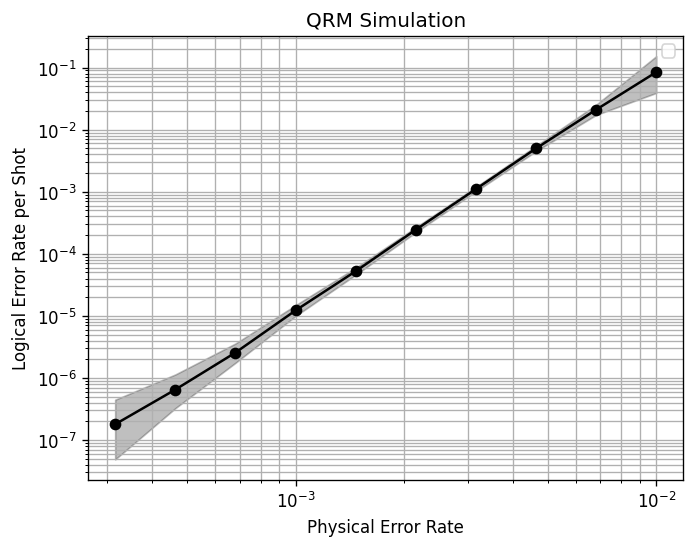

In [7]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 1)
sinter.plot_error_rate(
    ax=ax,
    stats=collected_stats,
    x_func=lambda stats: stats.json_metadata['noise'],
)
# ax.set_ylim(1e-6, 5e-1)
# ax.set_xlim(5e-4, 1e-2)
ax.loglog()
ax.set_title("QRM Simulation")
ax.set_xlabel("Physical Error Rate")
ax.set_ylabel("Logical Error Rate per Shot")
ax.grid(which='major')
ax.grid(which='minor')
ax.legend()
fig.set_dpi(120)  # Show it bigger

/var/folders/7j/yz8g10ld5n54t45czpzxpd180000gn/T/ipykernel_95351/3876593832.py:13: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


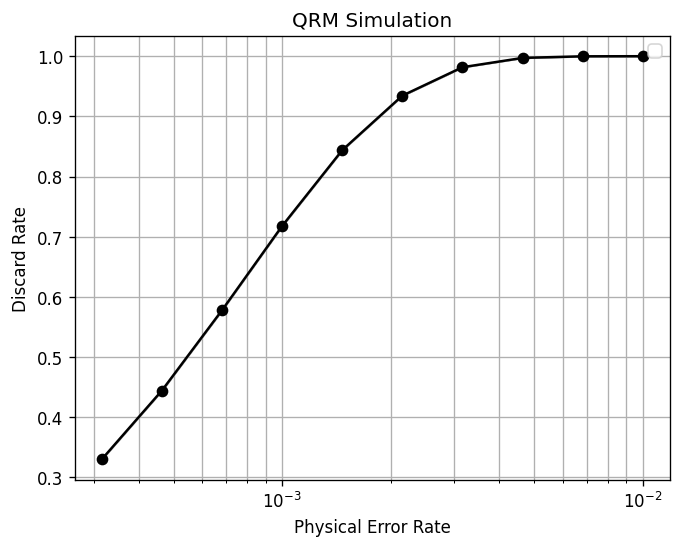

In [8]:
fig, ax = plt.subplots(1, 1)
sinter.plot_discard_rate(
    ax=ax,
    stats=collected_stats,
    x_func=lambda stats: stats.json_metadata['noise'],
)
ax.set_title("QRM Simulation")
ax.set_xlabel("Physical Error Rate")
ax.set_ylabel("Discard Rate")
ax.set_xscale("log")
ax.grid(which='major')
ax.grid(which='minor')
ax.legend()
fig.set_dpi(120)  # Show it bigger